# Problem 4 

### Part (d)

In [3]:
## Recursive Least Squares

import numpy as np
from numpy import linalg as npl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

m = 3  # number of parameters
n = 1000  # iterations

c = [1.,2.,3.]  # real coefficients
c_h = np.zeros(m)  # c_hat - estimated parameters
t = 0
Ts = 0.01
delta = .000001
P = 1/delta * np.eye(m)
q = np.zeros(m)

t_vec = np.zeros(n)
c_hvec = np.zeros((n,m))
c_vec = np.zeros((n,m))

for k in range(n):
    t = k * Ts
    u = np.sin(0.01*t) + np.sin(0.1*t) + np.sin(t) + np.sin(10.*t)

    q = np.hstack( (u, q[:-1]) )   # q update, shift previous values over
    d = q @ c

    kal = P @ q / (1 + q.T @ P @ q)
    e = d - q @ c_h

    c_h = c_h + kal * e
    P = P - kal * q @ P

    t_vec[k] = t
    c_hvec[k] = c_h

c_h=
 [1.04869936 1.9064229  3.04666673]


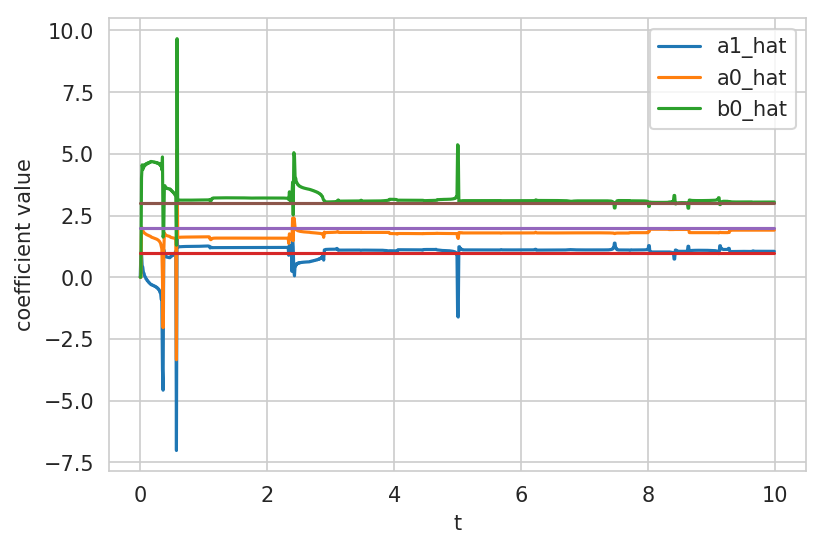

In [8]:
print('c_h=\n',c_h)

#### Plotting
c_vec[:,0] = c[0]
c_vec[:,1] = c[1]
c_vec[:,2] = c[2]

fig = plt.figure(dpi=150)
plt.plot(t_vec, c_hvec[:,0], label='a1_hat')
plt.plot(t_vec, c_hvec[:,1], label='a0_hat')
plt.plot(t_vec, c_hvec[:,2], label='b0_hat')

plt.plot(t_vec, c_vec[:,0])
plt.plot(t_vec, c_vec[:,1])
plt.plot(t_vec, c_vec[:,2])

plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('coefficient value')
plt.show()

### Part (e)

In [9]:
## Batch Least Squares
m = 3  # number of parameters
n = 10  # data points

c = [1.,2.,3.]  # real coefficients
c_h = np.zeros(m)  # c_hat - estimated parameters

Ts = 0.01
k = np.arange(n)
t = k*Ts

u = np.sin(0.01*t) + np.sin(0.1*t) + np.sin(t) + np.sin(10.*t)
A = np.zeros((n-2, 3))
A[:,0] = u[2:]
A[:,1] = u[1:-1]
A[:,2] = u[:-2]

d = A @ c

c_h = npl.inv(A.T @ A) @ A.T @ d

print('c_h =', c_h)

c_h = [1.00000751 2.00000063 2.99999897]


Batch least squares arrived closer to the real coefficients than recursive least squares and with fewer data points. However, increasing the number of datapoints significantly increases the amount of computation time due to the necessary inverse calculation in batch least squares.